In [1]:
import pandas as pd
import scipy.io as scio
import h5py
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# path_dir = '/liaoweiduo/HVC-Net-datasets'  # for ubuntu server
path_dir = '//10.20.2.245/datasets/HVC-Net-datasets'  # for windows

# Data set

## number of solution sets vs Hypervolume & number of solution sets vs number of solutions in each solution set

In [17]:
M = 3

## import data
train_data_file = f'test_data_M{M}_worst_9.mat'
path = os.path.join(path_dir, 'data', train_data_file)
data = h5py.File(path)

solutionset = np.transpose(data.get('Data'))  # [dataset_num, data_num, M]
hvc = np.transpose(data.get('HVCval')) # [dataset_num, data_num]

# contain nan

d:\documents\github\meta learning\meta-learning\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


max: 0.5683577039406398
min: 5.643996381365923e-11


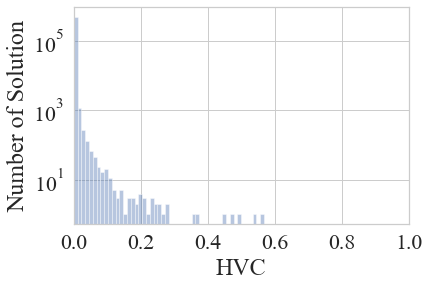

In [18]:
hvc_flatten = hvc[~np.isnan(hvc)]

collected_data = pd.DataFrame({'HVC': hvc_flatten})

## number of solution sets vs Hypervolume
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.distplot(collected_data['HVC'], hist=True, kde=False, rug=False)
fig.set_yscale('log')
plt.ylabel('Number of Solution')
plt.xlim([0,1])
print('max:', hvc_flatten.max())
print('min:', hvc_flatten.min())

# ## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'HV_hist_M{M}_2.png'), dpi=300, bbox_inches='tight')

In [3]:
# collect number of points in each dataset
num_points = []
for hvc_dataset in hvc:
    num_points.append(sum(~np.isnan(hvc_dataset)))
num_points = np.array(num_points)   # [dataset_num]

d:\documents\github\meta learning\meta-learning\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


max: -0.8593002612617002
min: -20.051155945464547


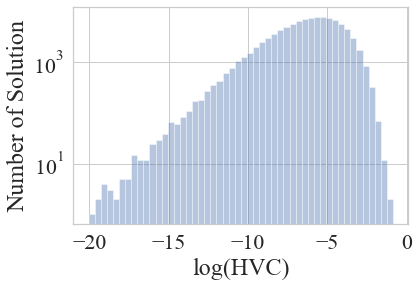

In [12]:
# draw HVC distribution for the specific dataset, and print the number of points in this dataset.

selected_num_points = 10

selected_point_indexs = []
for idx in range(len(num_points)):
    if num_points[idx] == selected_num_points:
        selected_point_indexs.append(idx)

hvc_dataset = hvc[selected_point_indexs]            # [n, 100]
hvc_dataset = hvc_dataset[~np.isnan(hvc_dataset)]   # [num]

hvc_dataset = np.log(hvc_dataset)      # 看看很小的数的分布情况

collected_data = pd.DataFrame({'log(HVC)': hvc_dataset})

## number of solution sets vs Hypervolume
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
ax = sns.distplot(collected_data['log(HVC)'], hist=True, kde=False, rug=False)
ax.set_yscale('log')
plt.ylabel('Number of Solution')
# plt.xlim([0, 0.5])
print('max:', hvc_dataset.max())
print('min:', hvc_dataset.min())


In [71]:
print(len(num_points))

1000000


In [ ]:
num_of_points = np.sum(~np.isnan(solutionset[:, :, 1]), axis=1)

collected_data = pd.DataFrame({'Number of Solutions in Each Solution Set': num_of_points})

## number of solution sets vs Hypervolume
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.distplot(collected_data['Number of Solutions in Each Solution Set'], hist=True, kde=False, rug=False)
plt.ylabel('Number of Solution Sets')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'numpoints_hist_M{M}_2.png'), dpi=300, bbox_inches='tight')

# Train graph


time (h) used for training: 383.79299441258115
time (h) used for training: 383.79299441258115


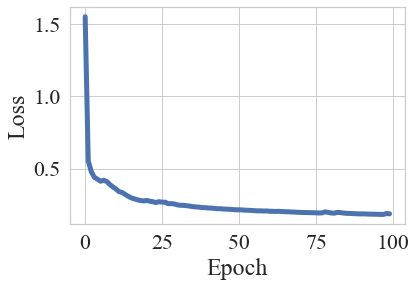

In [4]:
M = 10
collected_data = []

# ## num_blk = 3
# train_data_file = f'train_log_train_data_M{M}_100K_100_model_M{M}_100K_100.mat'
# path = os.path.join(path_dir, 'results', train_data_file)
# data = scio.loadmat(path)
# loss = data['loss'].reshape(-1)     # [1, 100] -> [100]
# time = data['time'].reshape(-1)     # [1, 100] -> [100]
# epoch = np.arange(loss.shape[0])
# collected_data.append(pd.DataFrame({'Loss': loss, 'Time': time, 'Epoch': epoch, 'K': 3}))

# print(f'time (h) used for training: {time[-1] / 3600.0}')

## num_blk = 5
train_data_file = f'train_log_train_data_M{M}_10_model_5_M{M}_10.mat'
path = os.path.join(path_dir, 'results', train_data_file)
data = scio.loadmat(path)
loss = data['loss'].reshape(-1)     # [1, 100] -> [100]
time = data['time'].reshape(-1)     # [1, 100] -> [100]
epoch = np.arange(loss.shape[0])
collected_data.append(pd.DataFrame({'Loss': loss, 'Time': time, 'Epoch': epoch, 'K': 5}))

print(f'time (h) used for training: {time[-1] / 3600.0}')
#
# ## num_blk = 10
# train_data_file = f'train_log_train_data_M{M}_10_model_10_M{M}_10.mat'
# path = os.path.join(path_dir, 'results', train_data_file)
# data = scio.loadmat(path)
# loss = data['loss'].reshape(-1)     # [1, 100] -> [100]
# time = data['time'].reshape(-1)     # [1, 100] -> [100]
# epoch = np.arange(loss.shape[0])
# collected_data.append(pd.DataFrame({'Loss': loss, 'Time': time, 'Epoch': epoch, 'K': 10}))

print(f'time (h) used for training: {time[-1] / 3600.0}')


collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.lineplot(data=collected_data[['Epoch', 'Loss', 'K']], x="Epoch", y="Loss", # hue="K",
                   palette=['blue'], # , 'green', 'red'
                   linewidth=5)
# fig.set_xscale('log')
# fig.set_yscale('log')
# plt.ylim([1e-3, 1e-1])

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'train_loss_M{M}_10_5.png'), dpi=300, bbox_inches='tight')


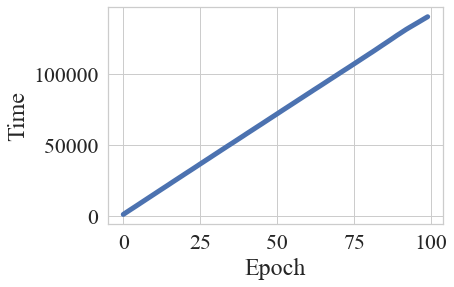

In [15]:
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.lineplot(data=collected_data[['Epoch', 'Time']], x="Epoch", y="Time", linewidth=5)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'train_time_M{M}_2.png'), dpi=300, bbox_inches='tight')

# Test graph

In [56]:
'''
Comparing HV-Net with HVC-Net idea 1, 2, 3
'''
M = 3
device = 'cuda'
collected_data = []
## import data

# HV-Net
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1, 10):
    test_file = f'result_model_M{M}_HVNet_5_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'HV-Net'}))    # index=[0]

# # Idea 2
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_old_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Idea 2'}))    # index=[0]

# # softmax MSE
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_sfmse_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'sft MSE'}))    # index=[0]

# # order preservation
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_odprsv_scel_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'order reserv'}))    # index=[0]

# # minimal awareness
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_minaware_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'min aware'}))    # index=[0]

# Idea3 1M
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '3 blk - 1M'}))    # index=[0]

# Idea3 100K
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '3 blk - 100K'}))    # index=[0]

# # Idea3 PF sample
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(1,10):
#     test_file = f'result_model_M{M}_100K_PF_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '3 blk - PF'}))    # index=[0]

# Idea3 5layer 100K
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_5_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '5 blk - 100K'}))    # index=[0]

collected_data = pd.concat(collected_data, ignore_index=True)

collected_data.head()


,Approximation Error,CIR min,CIR max,Runtime,Method
0,477.417208,0.1198,0.5221,10.950294,HV-Net
1,2221.216927,0.1161,0.5140,11.342589,HV-Net
2,512.612763,0.1128,0.5108,11.061878,HV-Net
3,293.949646,0.1182,0.5039,10.927310,HV-Net
4,730.950044,0.1133,0.5117,11.086932,HV-Net


In [26]:
'''
test
'''
M = 10
device = 'cuda'
collected_data = []
## import data

# HV-Net
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1, 10):
    test_file = f'result_model_M{M}_HVNet_5_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'HV-Net'}))    # index=[0]

# # Idea3 100K
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(1,10):
#     test_file = f'result_model_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=3'}))    # index=[0]

# # Idea3 5layer 100K
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(1,10):
#     test_file = f'result_model_5_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=5'}))    # index=[0]

# # Idea3 10layer 100K
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(1,10):
#     test_file = f'result_model_10_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=10'}))    # index=[0]

# Idea3 5layer 1M
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_5_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=5'}))    # index=[0]

# Idea3 10layer 1M
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_10_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=10'}))    # index=[0]

collected_data = pd.concat(collected_data, ignore_index=True)

collected_data.head()


,Approximation Error,CIR min,CIR max,Runtime,Method
0,40573.263057,0.0934,0.9517,12.516009,HV-Net
1,83522.374398,0.0954,0.9499,12.253673,HV-Net
2,137380.571025,0.0924,0.9493,12.643609,HV-Net
3,782587.399130,0.0921,0.9463,11.384516,HV-Net
4,411962.003076,0.0944,0.9476,11.533176,HV-Net


In [101]:
'''
在[101-200]上的泛化能力

在_best_与_worst_上的测试
'''
M = 10
device = 'cuda'
collected_data = []
## import data

# Idea3 5layer 1M [1-100]
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_5_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=5'}))    # index=[0]

# Idea3 10layer 1M [1-100]
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_10_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=10'}))    # index=[0]

# # Idea3 5layer 1M [101-200]
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(9,10):
#     test_file = f'result_model_5_M{M}_10_test_data_M{M}_200_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Shift, K=5'}))    # index=[0]

# # Idea3 10layer 1M [101-200]
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(9,10):
#     test_file = f'result_model_10_M{M}_10_test_data_M{M}_200_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Shift, K=10'}))    # index=[0]

# Idea3 5layer 1M best
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(9,10):
    test_file = f'result_model_5_M{M}_10_test_data_M{M}_best_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Best, K=5'}))    # index=[0]

# Idea3 10layer 1M best
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(9,10):
    test_file = f'result_model_10_M{M}_10_test_data_M{M}_best_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Best, K=10'}))    # index=[0]

# Idea3 5layer 1M worst
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(9,10):
    test_file = f'result_model_5_M{M}_10_test_data_M{M}_worst_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Worst, K=5'}))    # index=[0]

# Idea3 10layer 1M best
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(9,10):
    test_file = f'result_model_10_M{M}_10_test_data_M{M}_worst_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Worst, K=10'}))    # index=[0]

collected_data = pd.concat(collected_data, ignore_index=True)

collected_data.head()


,Approximation Error,CIR min,CIR max,Runtime,Method
0,1.185935,0.7955,0.9605,6.037474,K=5
1,0.657332,0.7963,0.9629,5.962015,K=5
2,1.086656,0.7929,0.9565,5.040008,K=5
3,0.736362,0.8046,0.9588,5.602906,K=5
4,0.931444,0.7955,0.9589,7.600349,K=5


[Text(0, 0, 'K=5'),
 Text(1, 0, 'K=10'),
 Text(2, 0, 'Best, K=5'),
 Text(3, 0, 'Best, K=10'),
 Text(4, 0, 'Worst, K=5'),
 Text(5, 0, 'Worst, K=10')]

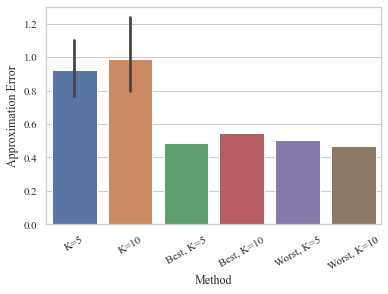

In [102]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="Approximation Error")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

# ## save plt
# ax.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_ApproximationError.png'), dpi=300, bbox_inches='tight')


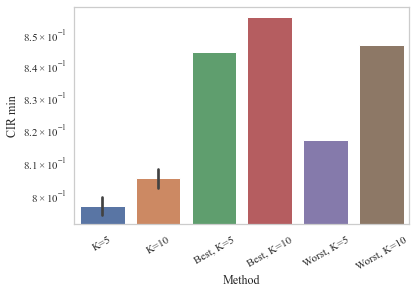

In [103]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="CIR min")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

## save plt
# ax.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_CIRmin.png'), dpi=300, bbox_inches='tight')


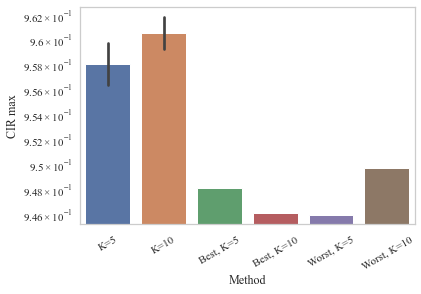

In [104]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="CIR max")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

## save plt
# ax.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_CIRmax.png'), dpi=300, bbox_inches='tight')


[Text(0, 0, 'K=5'),
 Text(1, 0, 'K=10'),
 Text(2, 0, 'Best, K=5'),
 Text(3, 0, 'Best, K=10'),
 Text(4, 0, 'Worst, K=5'),
 Text(5, 0, 'Worst, K=10')]

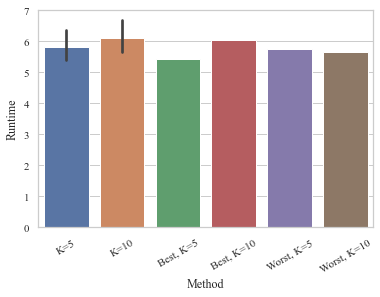

In [105]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="Runtime")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

## save plt
# ax.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_runtime.png'), dpi=300, bbox_inches='tight')


In [32]:
M = 10
collected_data = []
## MC R2
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
cirmin_MC, cirmax_MC, cirmin_R2, cirmax_R2 = [], [], [], []
for seed in range(0, 10):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
# for seed in range(9, 10):
#     test_MCR2_file = f'result_MC_R2_test_data_M{M}_200_{seed}.mat'
    path = os.path.join(path_dir, 'results', test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    cirmin_MC.append(data['CIR_min'].reshape(-1))
    cirmax_MC.append(data['CIR_max'].reshape(-1))
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]
    cirmin_R2.append(data['CIR_min1'].reshape(-1))
    cirmax_R2.append(data['CIR_max1'].reshape(-1))

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
cirmin_MC = np.mean(np.stack(cirmin_MC), axis=0)     # [20,]
cirmax_MC = np.mean(np.stack(cirmax_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]
cirmin_R2 = np.mean(np.stack(cirmin_R2), axis=0)     # [20,]
cirmax_R2 = np.mean(np.stack(cirmax_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'CIR min': cirmin_MC, 'CIR max': cirmax_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'CIR min': cirmin_R2, 'CIR max': cirmax_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

## K=5
device = 'cuda'
loss_net, time_net = [], []
cirmin_net, cirmax_net = [], []
for seed in range(1, 10):
    test_net_file = f'result_model_5_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
# for seed in range(9, 10):
#     test_net_file = f'result_model_5_M{M}_10_test_data_M{M}_200_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    cirmin_net.append(data['CIR_min'].reshape(-1))
    cirmax_net.append(data['CIR_max'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
cirmin_net = np.mean(np.stack(cirmin_net), axis=0)
cirmax_net = np.mean(np.stack(cirmax_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'CIR min': cirmin_net, 'CIR max': cirmax_net, 'Runtime': time_net, 'Method': 'HVC-Net'}, index=[0]))

# ## K=10
# device = 'cuda'
# loss_net, time_net = [], []
# cirmin_net, cirmax_net = [], []
# for seed in range(1, 10):
#     test_net_file = f'result_model_10_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_net_file)
#     data = scio.loadmat(path)
#     loss_net.append(data['loss'].reshape(-1))
#     cirmin_net.append(data['CIR_min'].reshape(-1))
#     cirmax_net.append(data['CIR_max'].reshape(-1))
#     time_net.append(data['time'].reshape(-1))
#
# loss_net = np.mean(np.stack(loss_net), axis=0)
# time_net = np.mean(np.stack(time_net), axis=0)
# cirmin_net = np.mean(np.stack(cirmin_net), axis=0)
# cirmax_net = np.mean(np.stack(cirmax_net), axis=0)
# collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'CIR min': cirmin_net, 'CIR max': cirmax_net, 'Runtime': time_net, 'Method': 'HVC-Net-10'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

collected_data.head()

,Approximation Error,CIR min,CIR max,Runtime,Method
0,6.476881e+06,0.215016,0.851072,232.196283,Point-based
1,7.047610e+06,0.324806,0.890540,298.277272,Point-based
2,6.501633e+06,0.413301,0.909886,365.809566,Point-based
3,6.620593e+06,0.486415,0.921772,433.381817,Point-based
4,6.708814e+06,0.543751,0.928492,502.324583,Point-based


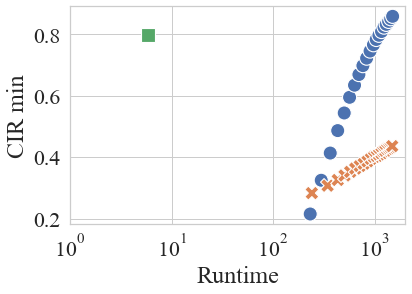

In [34]:
target = "CIR min"
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400])  # , 400
fig = sns.scatterplot(data=collected_data, x="Runtime", y=target,
                      hue="Method",
                      # palette=['blue', 'green', 'red'],  #, 'purple'
                      style="Method",
                      # markers=['s', 'o', 'P'],  # ,'X'
                      s=size, legend=False)
                      # s=size)
# fig.invert_yaxis()
# plt.legend(loc='upper right', framealpha=1)
fig.set_xscale('log')
fig.set_xlim([1e0, fig.get_xlim()[1]])

# plt.setp(fig.get_legend().get_title(), fontsize=10)
# plt.setp(fig.get_legend().get_texts(), fontsize=20)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{"".join(target.split(" "))}_{device}.png'), dpi=300, bbox_inches='tight')
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{"".join(target.split(" "))}_{device}_200.png'), dpi=300, bbox_inches='tight')

(1.0, 9000.0)

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

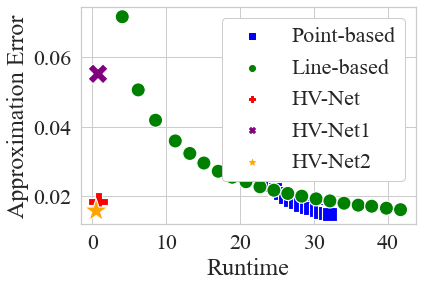

In [43]:
M = 3
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net2'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 400, 600])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red', 'purple', 'orange'],
                      style="Method",
                      markers=['s', 'o', 'P','X','*'],
                      s=size)

plt.legend(loc='upper right', framealpha=1.0)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

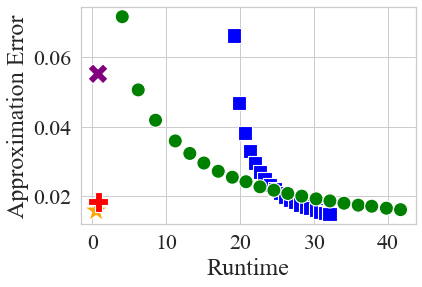

In [55]:
M = 3
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all_nolegend.png'), dpi=300, bbox_inches='tight')

## M5

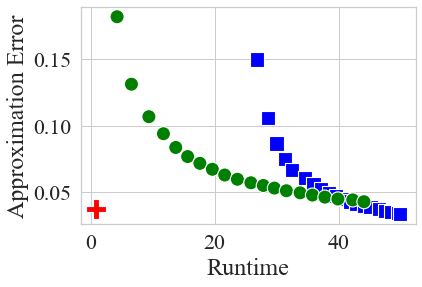

In [45]:
M = 5
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size, legend=False)
## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

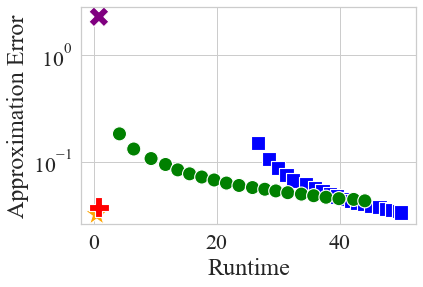

In [54]:
M = 5
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)
fig.set_yscale('log')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

## M8

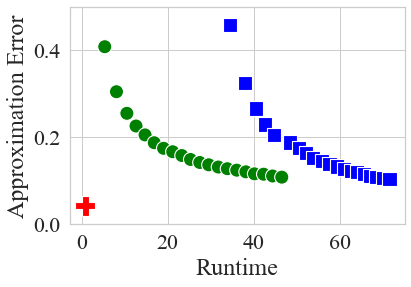

In [57]:
M = 8
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size, legend=False)
plt.ylim([0.0, 0.5])

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

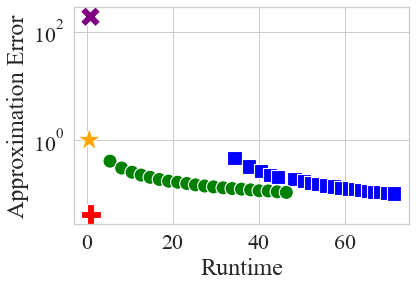

In [53]:
M = 8
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)
fig.set_yscale('log')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

## M10

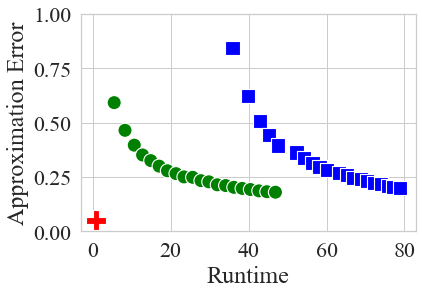

In [58]:
M = 10
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size, legend=False)
plt.ylim([0.0, 1.0])

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

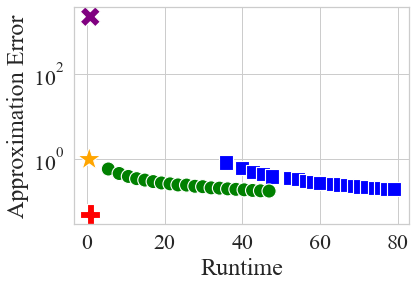

In [50]:
M = 10
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)
fig.set_yscale('log')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

# Table

for test data

In [66]:
collected_data = []

## M3, HVnet
M = 3
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet
M = 5
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet
M = 8
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet
M = 10
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet1
M = 3
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet1
M = 5
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet1
M = 8
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet1
M = 10
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet2
M = 3
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet2
M = 5
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet2
M = 8
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet2
M = 10
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))


collected_data = pd.concat(collected_data, ignore_index=True)
print(collected_data.head())

   M  Method  Approximation Error   Runtime
0  3  HV-Net             0.018017  0.747908
1  3  HV-Net             0.018671  0.837171
2  3  HV-Net             0.018173  0.746521
3  3  HV-Net             0.018076  0.816422
4  3  HV-Net             0.018529  0.782115


In [77]:
## 统计信息

print('mean\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].mean())
print('std\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].std())

mean
 M   Method 
3   HV-Net        0.018541
    HV-Net1       0.055279
    HV-Net2       0.015878
5   HV-Net        0.037459
    HV-Net1       2.270159
    HV-Net2       0.032067
8   HV-Net        0.042566
    HV-Net1     187.189718
    HV-Net2       1.000000
10  HV-Net        0.050867
    HV-Net1    2212.552783
    HV-Net2       1.000000
Name: Approximation Error, dtype: float64
std
 M   Method 
3   HV-Net        0.000610
    HV-Net1       0.049188
    HV-Net2       0.000474
5   HV-Net        0.019415
    HV-Net1       3.372767
    HV-Net2       0.004108
8   HV-Net        0.009939
    HV-Net1     445.316438
    HV-Net2       0.000000
10  HV-Net        0.013152
    HV-Net1    6384.454910
    HV-Net2       0.000000
Name: Approximation Error, dtype: float64


for train data

In [81]:
collected_data = []

## M3, HVnet
M = 3
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet
M = 5
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet
M = 8
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet
M = 10
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet1
M = 3
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet1
M = 5
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet1
M = 8
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet1
M = 10
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet2
M = 3
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet2
M = 5
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet2
M = 8
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet2
M = 10
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))


collected_data = pd.concat(collected_data, ignore_index=True)
print(collected_data.head())

    M   Method  Approximation Error      Runtime
0   3   HV-Net             0.018489  2627.757659
1   5   HV-Net             0.030241  2647.382997
2   8   HV-Net             0.036301  2646.048841
3  10   HV-Net             0.042178  2638.513413
4   3  HV-Net1             0.056103  2629.771329


In [82]:
## 统计信息

print('mean\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].mean())
print('std\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].std())


mean
 M   Method 
3   HV-Net        0.018489
    HV-Net1       0.056103
    HV-Net2       0.015699
5   HV-Net        0.030241
    HV-Net1       4.777839
    HV-Net2       0.030650
8   HV-Net        0.036301
    HV-Net1    1094.425093
    HV-Net2       1.000000
10  HV-Net        0.042178
    HV-Net1    6848.726503
    HV-Net2       1.000000
Name: Approximation Error, dtype: float64
std
 M   Method 
3   HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
5   HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
8   HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
10  HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
Name: Approximation Error, dtype: float64
